In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

In [ ]:
# def new_func():
#     df = pd.read_csv('data/Health.csv', low_memory=False).rename({
#     'hhidpn': 'id',
#     'rmstat': 'состоит в браке',
#     'ragender': 'пол',
#     'collegeplus': 'закончил колледж',
#     'rahispan': 'латиноамериканец',
#     'raracem': 'раса',
#     'riwbegy': 'date',
#     'ragey_b': 'возраст',
#     'sagey_b': 'возраст супруга/супруги',
#     'retired': 'на пенсии',
#     'rlbrf': 'сколько работает', # статус на рынке труда
#     'index_wave': 'волна опроса',
#     'cpi': 'индекс потребительских цен',
#     'rhltc': 'изменение здоровья',
#     'rhlthlm': 'проблемы со здоровьем ограничивают возможность работать',
#     'rhibpe': 'высокое давление',
#     'rdiabe': 'диабет',
#     'rcancre': 'рак',
#     'rlunge': 'болезнь легких',
#     'rhearte': 'заболевание сердца',
#     'rstroke': 'инсульт',
#     'rpsyche': 'психические заболевания',
#     'rarthre': 'артрит',
#     'rhosp': 'попадал в больницу за последний год',
#     'rhspnit': 'кол-во ночей, которое провел в больнице',
#     'oop_spend': 'медицинские расходы, не покрываемые страховкой',
#     'riearn': 'доход от зп',
#     'siearn': 'доход супруга от зп',
#     'ripena': 'доход от пенсии',
#     'sipena': 'доход супруга от пенсии',
#     'rgov': 'доход от др выплат',
#     'sgov': 'доход супруга от др выплат',
#     'rcovr': 'мед страховка оплачивается работадателем респондента',
#     'rcovs': 'мед страховка оплачивается работадателем супруга',
#     'insured_gov': 'гос мед страховка',
#     'uninsured': 'отсутствие мед страховки',
#     'rjphys': 'работа требует физ усилий',
#     'rjlift': 'работа требует поднятие тяжестей',
#     'rjweeks': 'сколько недель работал на осн работе за последний год',
#     'rjweek2': 'сколько недель работал на 2 работе за последний год',
#     'rjcten': 'сколько проработал на нынещнем рабочем месте'
# }, axis=1).replace({'.m': np.nan, '.p': np.nan, '.k': np.nan,
#                     '.a': np.nan, '.u': np.nan, '.d': np.nan,
#                     '.w': np.nan, '.s': np.nan, '.n': np.nan,
#                     '.x': np.nan, '.v': np.nan, '.r': np.nan,
#                     '.y': np.nan, '.c': np.nan, '.e': np.nan,
#                     '.t': np.nan, '.z': np.nan})
#     df['сколько работает'] = df['сколько работает'].replace({1: 'полный рабочий день', 2: 'частичный рабочий день', 3:'безработный',
#                                                         4:'частично на пенсии', 5: 'на пенсии', 6:'инвалид', 7:'не работает'})
#     df['состоит в браке'] = df['состоит в браке'].fillna(-1).astype('int').replace({1: 'да', 2: 'да, супруг отсутствует', 3: 'совместное проживание',
#                                                        4: 'разошлись, но в оф браке', 5: 'разошлись', 6: 'не понятно',
#                                                        7: 'вдова', 8: 'никогда не состоял в браке', -1: np.nan})

#     df.to_csv('data/new_df.csv', index=False)

# new_func()

In [ ]:
def get_dataframe():
    df = pd.read_csv('data/new_df.csv')
    df['на пенсии'] /= 100
    
    df['доход от зп'] = df['доход от зп'] / df['индекс потребительских цен']
    df['доход от др выплат'] = df['доход от др выплат'] / df['индекс потребительских цен']
    df['доход от пенсии'] = df['доход от пенсии'] / df['индекс потребительских цен']
    df['доход нормализованный'] = df['доход от зп'] + df['доход от др выплат'] + df['доход от пенсии']
    
    df['доход супруга от зп'] = df['доход супруга от зп'] / df['индекс потребительских цен']
    df['доход супруга от др выплат'] = df['доход супруга от др выплат'] / df['индекс потребительских цен']
    df['доход супруга от пенсии'] = df['доход супруга от пенсии'] / df['индекс потребительских цен']
    df['доход супруга нормализованный'] = df['доход супруга от зп'] + df['доход супруга от др выплат'] + df['доход супруга от пенсии']
    df['общий доход'] = df['доход нормализованный'] + df['доход супруга нормализованный']
    
    
    # df = df[(df['сколько работает']!='полный рабочий день')|(df['доход нормализованный']!=0)]
    
    df['плохой доход'] = 0
    df.loc[df['доход нормализованный']==0, 'плохой доход'] = 1

    df.loc[(df['на пенсии']==1)&(df['доход от пенсии']==0)&(df['доход от др выплат']==0), ['сколько работает', 'на пенсии']] = ('полный рабочий день', 0)
    
    return df
diseases = ['высокое давление', 'диабет', 'рак', 'болезнь легких', 'заболевание сердца', 'инсульт', 'психические заболевания', 'артрит']
df = get_dataframe()

df['сколько работает num'] = df['сколько работает'].replace({
    'на пенсии': 0,
    'полный рабочий день': 2,
    'не работает': 0,
    'частично на пенсии': 1,
    'частичный рабочий день': 1,
    'инвалид': 0,
    'безработный': 0
})
df['sum'] = df[diseases].sum(axis=1)
df['пол'] = df['пол'].replace({1:'мужской', 2:'женский'})

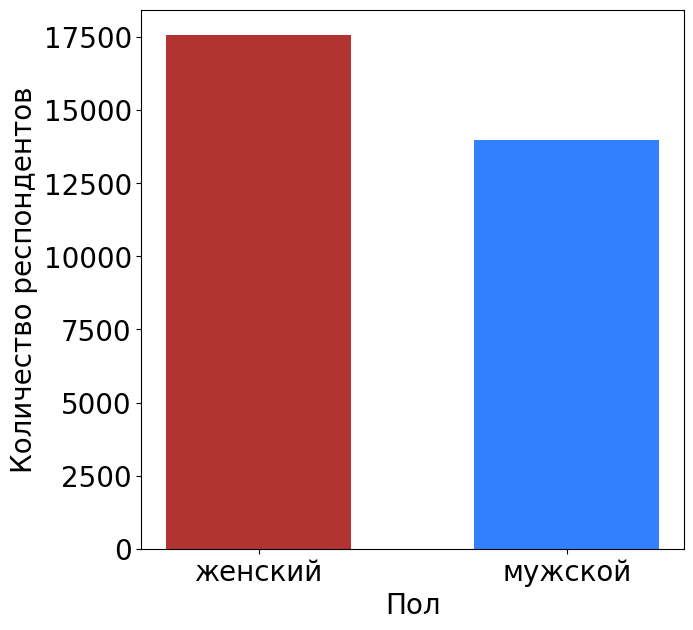

<Figure size 700x700 with 0 Axes>

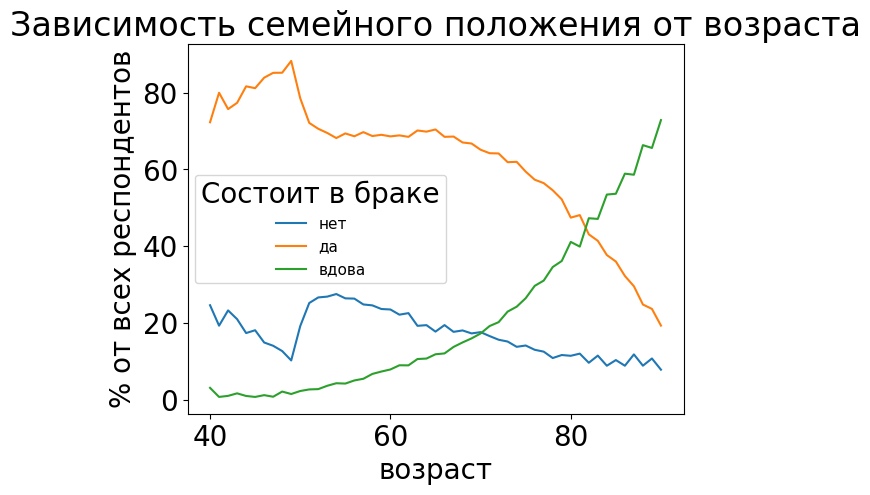

<Figure size 700x700 with 0 Axes>

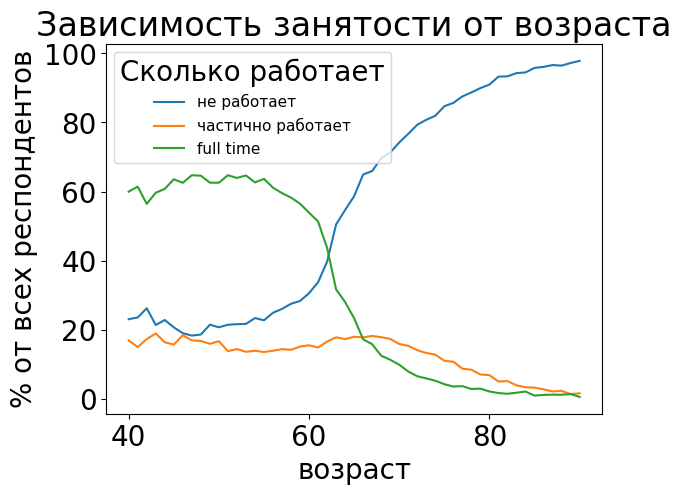

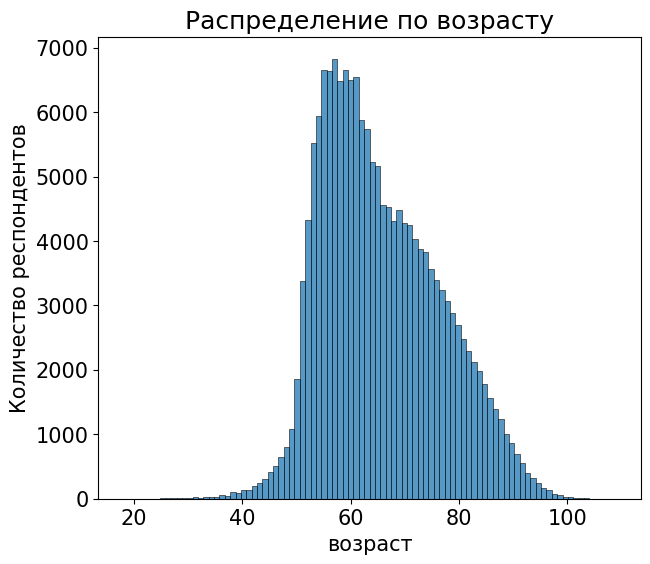

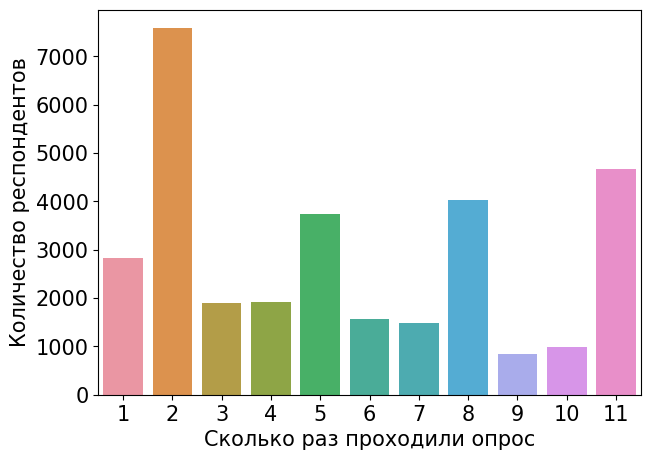

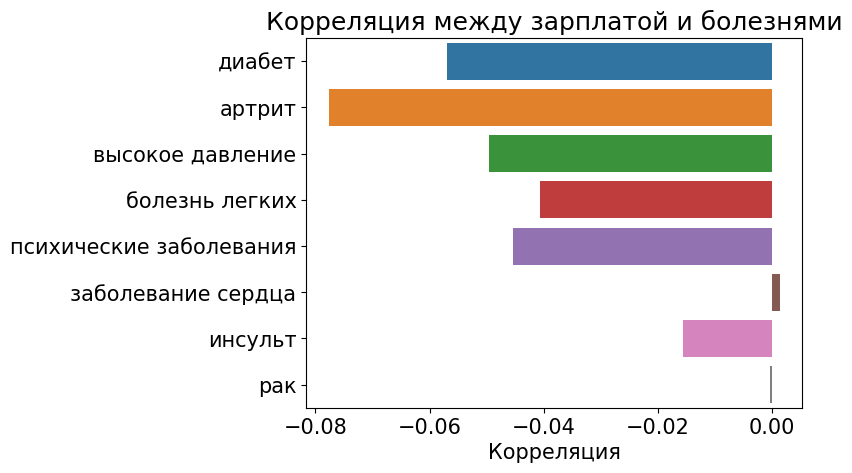

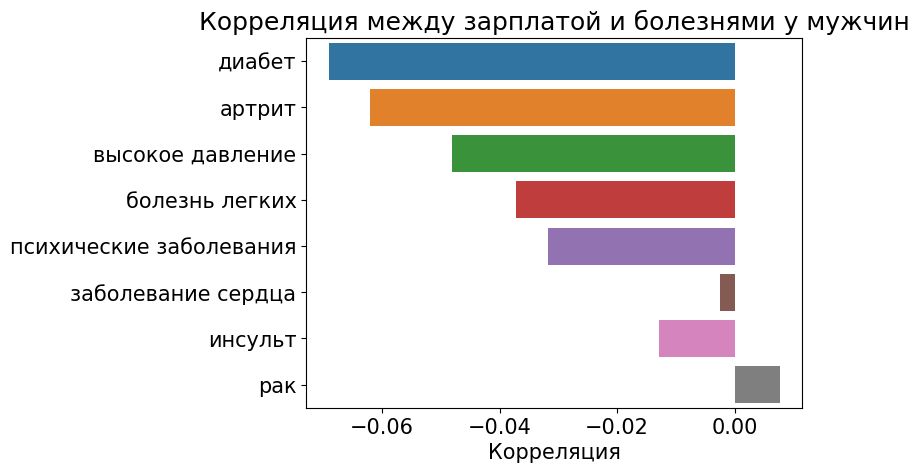

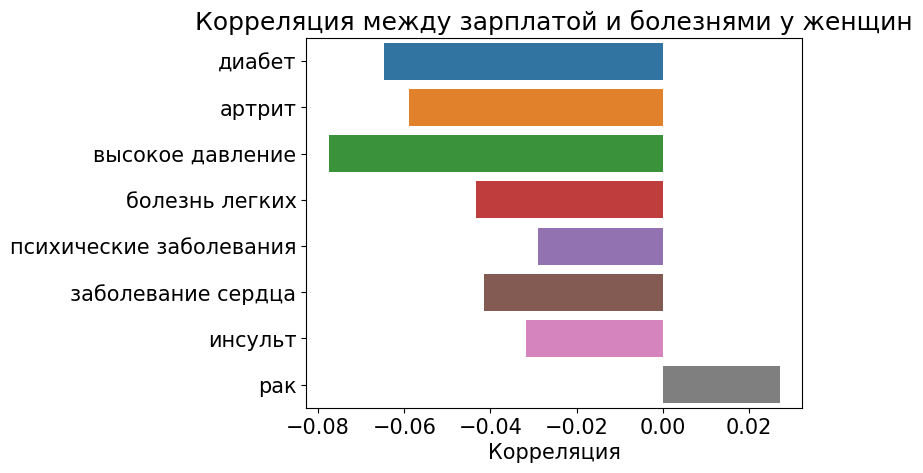

In [ ]:
a = df.groupby('пол')['id'].nunique()
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 20})
plt.bar(a.index, a.tolist(), color=((0.7,0.2,0.2), (0.2, 0.5, 1)), width=0.6)
plt.ylabel('Количество респондентов')
plt.xlabel('Пол')
plt.show()

df['в браке'] = (df['состоит в браке']=='да').astype('int')
df.loc[df['состоит в браке']=='вдова', 'в браке'] = 2

plt.figure(figsize=(7,7))
a = df[(df['возраст']>=40)&(df['возраст']<=90)].groupby(['возраст', 'в браке']).size().unstack().fillna(0)
a['sum'] = a.sum(axis=1)
for x in a.columns[:-1]: a[x] /= a['sum']
a.drop('sum', axis=1, inplace=True)
(a * 100).plot()
plt.title('Зависимость семейного положения от возраста')
plt.ylabel('% от всех респондентов')
plt.legend(['нет', 'да', 'вдова'], title='Состоит в браке', fontsize=11)
plt.show()


plt.figure(figsize=(7,7))
a = df[(df['возраст']>=40)&(df['возраст']<=90)].groupby(['возраст', 'сколько работает num']).size().unstack().fillna(0)
a['sum'] = a.sum(axis=1)
for x in a.columns[:-1]: a[x] /= a['sum']
a.drop('sum', axis=1, inplace=True)
(a * 100).plot()
plt.title('Зависимость занятости от возраста')
plt.ylabel('% от всех респондентов')
plt.legend(['не работает', 'частично работает', 'full time'], title='Сколько работает', fontsize=11)
plt.show()


plt.figure(figsize=(7,6))
plt.rcParams.update({'font.size': 15})

sns.histplot(df['возраст'], bins=92)
plt.ylabel('Количество респондентов')
plt.title('Распределение по возрасту')
plt.show()


plt.figure(figsize=(7,5))

a = df.groupby('id').size().value_counts()
sns.barplot(x=a.index, y=a.values)

plt.xlabel('Сколько раз проходили опрос')
plt.ylabel('Количество респондентов')
plt.show()


new_df = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['доход от зп']>0)&(df['сколько работает']=='полный рабочий день')]
a = new_df[['доход от зп']+diseases].corr()['доход от зп']
a = a[a!=1]
sns.barplot(y=a.index, x=a.tolist(), order=['диабет', 'артрит', 'высокое давление',
                                             'болезнь легких', 'психические заболевания', 'заболевание сердца', 'инсульт', 'рак'])
plt.title('Корреляция между зарплатой и болезнями')
plt.xlabel('Корреляция', fontsize=15)
plt.show()


new_df = df[(df['пол']=='мужской')&(df['возраст']>=40)&(df['возраст']<=65)&(df['доход от зп']>0)&(df['сколько работает']=='полный рабочий день')]
a = new_df[['доход от зп']+diseases].corr()['доход от зп']
a = a[a!=1]
sns.barplot(y=a.index, x=a.tolist(), order=['диабет', 'артрит', 'высокое давление',
                                             'болезнь легких', 'психические заболевания', 'заболевание сердца', 'инсульт', 'рак'])
plt.title('Корреляция между зарплатой и болезнями у мужчин')
plt.xlabel('Корреляция', fontsize=15)
plt.show()


new_df = df[(df['пол']=='женский')&(df['возраст']>=40)&(df['возраст']<=65)&(df['доход от зп']>0)&(df['сколько работает']=='полный рабочий день')]
a = new_df[['доход от зп']+diseases].corr()['доход от зп']
a = a[a!=1]
sns.barplot(y=a.index, x=a.tolist(), order=['диабет', 'артрит', 'высокое давление',
                                             'болезнь легких', 'психические заболевания', 'заболевание сердца', 'инсульт', 'рак'])
plt.title('Корреляция между зарплатой и болезнями у женщин')
plt.xlabel('Корреляция', fontsize=15)
plt.show()

1 гипотеза

Text(0.5, 1.0, 'Влияние зп на здоровье в текущее время')

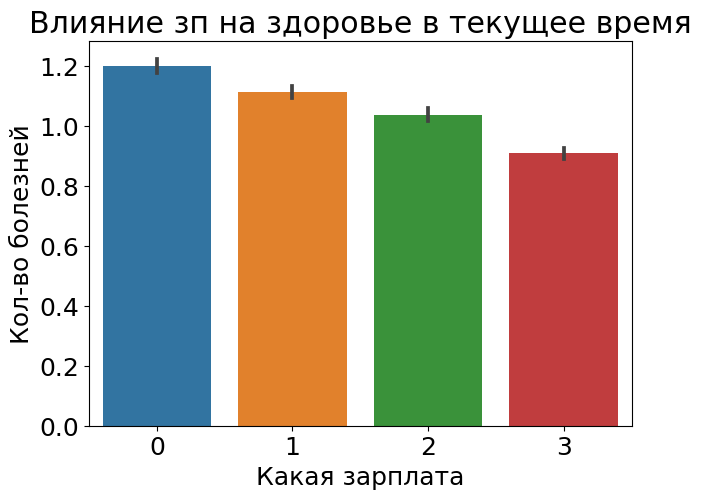

In [ ]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 18})

new_df = df[(df['возраст']<=65)&(df['возраст']>=40)&(df['сколько работает']=='полный рабочий день')&(df['доход от зп']!=0)]
income_q = new_df['доход от зп'].quantile([0.25,0.5,0.75]).tolist()
new_df['доход категория'] = (new_df['доход от зп'] > income_q[0]).astype(np.int8)
new_df.loc[new_df['доход от зп']>income_q[1], 'доход категория'] = 2
new_df.loc[new_df['доход от зп']>income_q[2], 'доход категория'] = 3
new_df.groupby('доход категория')['sum']
sns.barplot(data=new_df, x='доход категория', y='sum')
plt.ylabel('Кол-во болезней')
plt.xlabel('Какая зарплата')
plt.title('Влияние зп на здоровье в текущее время')

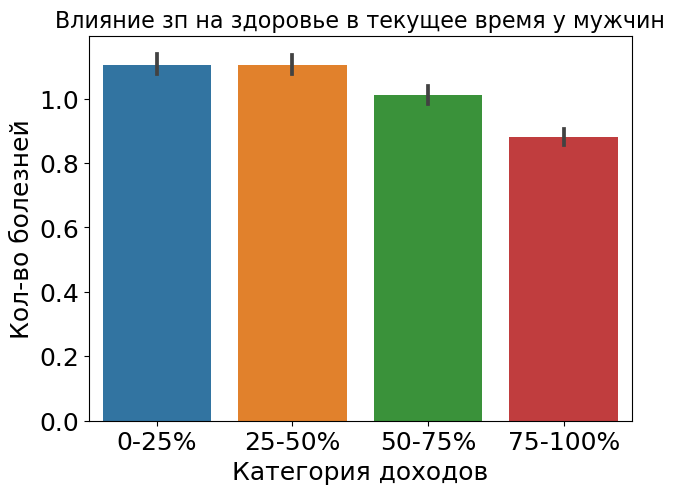

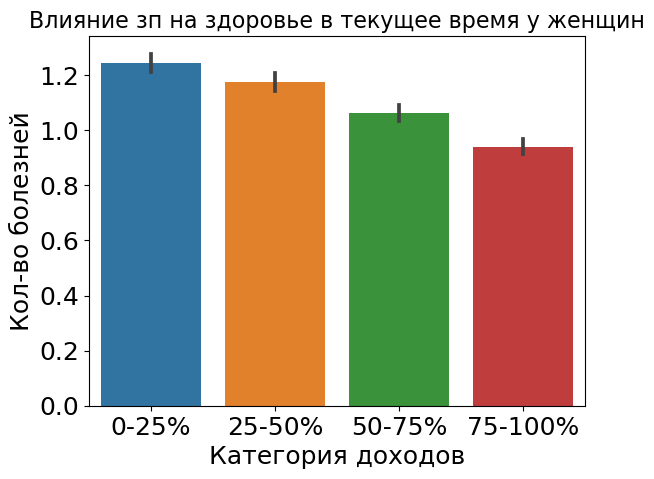

Text(0.5, 1.0, 'Влияние зп на здоровье в текущее время')

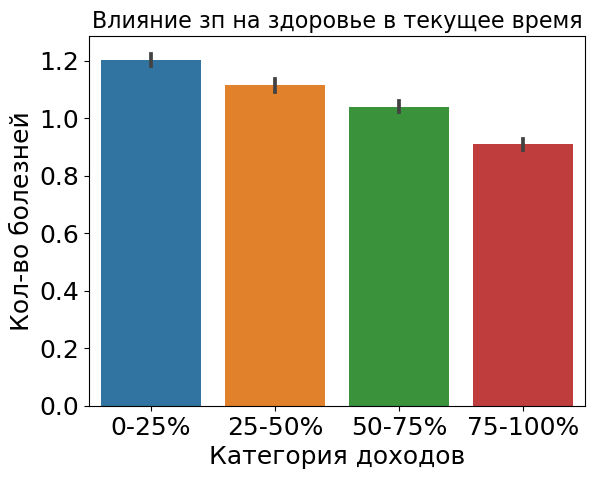

In [ ]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 18})

new_df = df[(df['пол']=='мужской')&(df['возраст']<=65)&(df['возраст']>=40)&(df['сколько работает']=='полный рабочий день')&(df['доход от зп']!=0)]
income_q = new_df['доход от зп'].quantile([0.25,0.5,0.75]).tolist()
new_df['доход категория'] = (new_df['доход от зп'] > income_q[0]).astype(np.int8)
new_df.loc[new_df['доход от зп']>income_q[1], 'доход категория'] = 2
new_df.loc[new_df['доход от зп']>income_q[2], 'доход категория'] = 3
new_df['доход категория'] = new_df['доход категория'].replace({0:'0-25%',
                                                               1:'25-50%',
                                                               2:'50-75%',
                                                               3:'75-100%'})
sns.barplot(data=new_df, x='доход категория', y='sum', order=['0-25%', '25-50%', '50-75%', '75-100%'])
plt.xlabel('Категория доходов')
plt.ylabel('Кол-во болезней')
plt.title('Влияние зп на здоровье в текущее время у мужчин', fontsize=16)
plt.show()

new_df = df[(df['пол']=='женский')&(df['возраст']<=65)&(df['возраст']>=40)&(df['сколько работает']=='полный рабочий день')&(df['доход от зп']!=0)]
income_q = new_df['доход от зп'].quantile([0.25,0.5,0.75]).tolist()
new_df['доход категория'] = (new_df['доход от зп'] > income_q[0]).astype(np.int8)
new_df.loc[new_df['доход от зп']>income_q[1], 'доход категория'] = 2
new_df.loc[new_df['доход от зп']>income_q[2], 'доход категория'] = 3
new_df['доход категория'] = new_df['доход категория'].replace({0:'0-25%',
                                                               1:'25-50%',
                                                               2:'50-75%',
                                                               3:'75-100%'})
sns.barplot(data=new_df, x='доход категория', y='sum', order=['0-25%', '25-50%', '50-75%', '75-100%'])
plt.xlabel('Категория доходов')
plt.ylabel('Кол-во болезней')
plt.title('Влияние зп на здоровье в текущее время у женщин', fontsize=16)
plt.show()

new_df = df[(df['возраст']<=65)&(df['возраст']>=40)&(df['сколько работает']=='полный рабочий день')&(df['доход от зп']!=0)]
income_q = new_df['доход от зп'].quantile([0.25,0.5,0.75]).tolist()
new_df['доход категория'] = (new_df['доход от зп'] > income_q[0]).astype(np.int8)
new_df.loc[new_df['доход от зп']>income_q[1], 'доход категория'] = 2
new_df.loc[new_df['доход от зп']>income_q[2], 'доход категория'] = 3
new_df['доход категория'] = new_df['доход категория'].replace({0:'0-25%', 1:'25-50%', 2:'50-75%', 3:'75-100%'})
sns.barplot(data=new_df, x='доход категория', y='sum', order=['0-25%', '25-50%', '50-75%', '75-100%'])
plt.xlabel('Категория доходов')
plt.ylabel('Кол-во болезней')
plt.title('Влияние зп на здоровье в текущее время', fontsize=16)

In [ ]:
new_df = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает']=='полный рабочий день')]
new_df['кол'] = new_df['сколько недель работал на осн работе за последний год']+new_df['сколько недель работал на 2 работе за последний год']


Text(0.5, 0, 'Корреляция')

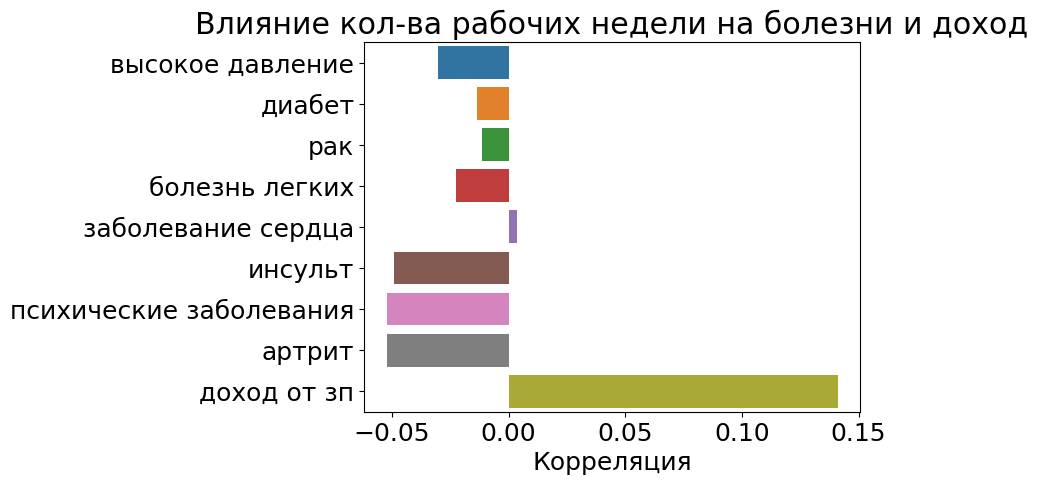

In [ ]:
a = new_df.groupby(['возраст'])[diseases+['кол', 'доход от зп']].corr()['кол'].unstack().mean(axis=0)
a = a[a!=1]
sns.barplot(y=a.index, x=a.tolist())
plt.title('Влияние кол-ва рабочих недели на болезни и доход')
plt.xlabel('Корреляция')

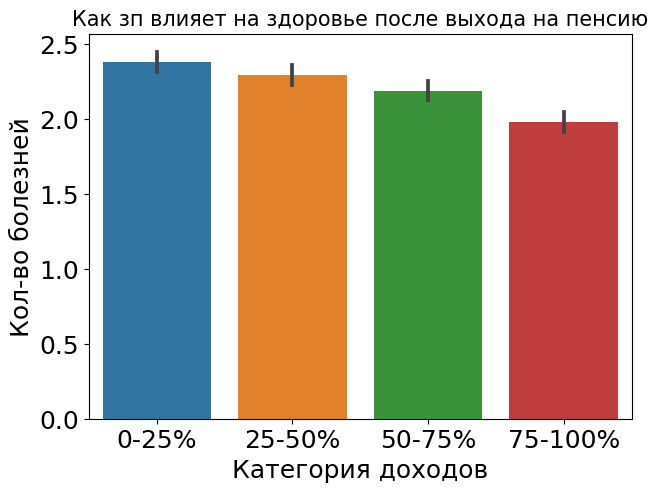

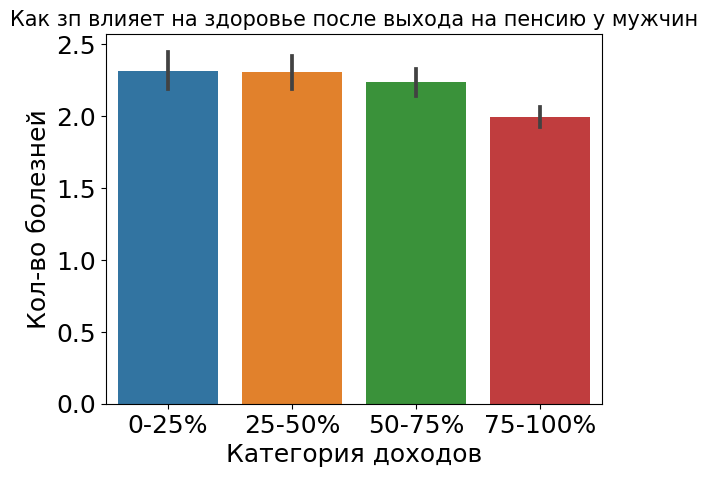

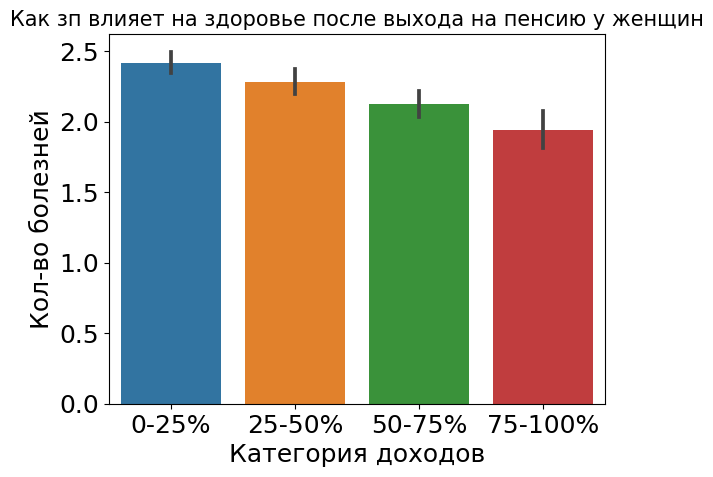

In [ ]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 18})

a = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает']=='полный рабочий день')&(df['доход от зп']!=0)].groupby('id')[['доход от зп']].median()
b = df[(df['сколько работает']=='на пенсии')].groupby('id')['sum'].mean()
a = a.merge(b, how='left', left_index=True, right_index=True).dropna()

a['доход категория'] = (a['доход от зп'] > income_q[0]).astype(np.int8)
a.loc[a['доход от зп']>income_q[1], 'доход категория'] = 2
a.loc[a['доход от зп']>income_q[2], 'доход категория'] = 3
a['доход категория'] = a['доход категория'].replace({0:'0-25%', 1:'25-50%', 2:'50-75%', 3:'75-100%'})
sns.barplot(data=a, x='доход категория', y='sum', order=['0-25%', '25-50%', '50-75%', '75-100%'])
plt.xlabel('Категория доходов')
plt.ylabel('Кол-во болезней')
plt.title('Как зп влияет на здоровье после выхода на пенсию', fontsize=15)
plt.show()


a = df[(df['пол']=='мужской')&(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает']=='полный рабочий день')&(df['доход от зп']!=0)].groupby('id')[['доход от зп']].median()
b = df[(df['сколько работает']=='на пенсии')].groupby('id')['sum'].mean()
a = a.merge(b, how='left', left_index=True, right_index=True).dropna()

a['доход категория'] = (a['доход от зп'] > income_q[0]).astype(np.int8)
a.loc[a['доход от зп']>income_q[1], 'доход категория'] = 2
a.loc[a['доход от зп']>income_q[2], 'доход категория'] = 3
a['доход категория'] = a['доход категория'].replace({0:'0-25%', 1:'25-50%', 2:'50-75%', 3:'75-100%'})
sns.barplot(data=a, x='доход категория', y='sum', order=['0-25%', '25-50%', '50-75%', '75-100%'])
plt.xlabel('Категория доходов')
plt.ylabel('Кол-во болезней')
plt.title('Как зп влияет на здоровье после выхода на пенсию у мужчин', fontsize=15)
plt.show()


a = df[(df['пол']=='женский')&(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает']=='полный рабочий день')&(df['доход от зп']!=0)].groupby('id')[['доход от зп']].median()
b = df[(df['сколько работает']=='на пенсии')].groupby('id')['sum'].mean()
a = a.merge(b, how='left', left_index=True, right_index=True).dropna()
a['доход категория'] = (a['доход от зп'] > income_q[0]).astype(np.int8)
a.loc[a['доход от зп']>income_q[1], 'доход категория'] = 2
a.loc[a['доход от зп']>income_q[2], 'доход категория'] = 3
a['доход категория'] = a['доход категория'].replace({0:'0-25%', 1:'25-50%', 2:'50-75%', 3:'75-100%'})
sns.barplot(data=a, x='доход категория', y='sum', order=['0-25%', '25-50%', '50-75%', '75-100%'])
plt.xlabel('Категория доходов')
plt.ylabel('Кол-во болезней')
plt.title('Как зп влияет на здоровье после выхода на пенсию у женщин', fontsize=15)
plt.show()

In [ ]:
df['в браке'] = (df['состоит в браке']=='да').astype('int')
a = df[(df['возраст']>=40)&(df['возраст']<=80)].groupby(['возраст','в браке'])[diseases].mean().unstack().mean(axis=0).unstack()
for x in a[1]:
    print(round(x, 3))

0.403
0.138
0.094
0.055
0.153
0.044
0.097
0.417


In [ ]:
df

,id,состоит в браке,пол,латиноамериканец,раса,date,возраст,возраст супруга/супруги,изменение здоровья,проблемы со здоровьем ограничивают возможность работать,высокое давление,диабет,рак,болезнь легких,заболевание сердца,инсульт,психические заболевания,артрит,попадал в больницу за последний год,"кол-во ночей, которое провел в больнице","медицинские расходы, не покрываемые страховкой",доход от зп,доход от пенсии,доход супруга от зп,доход супруга от пенсии,мед страховка оплачивается работадателем респондента,мед страховка оплачивается работадателем супруга,сколько работает,работа требует физ усилий,работа требует поднятие тяжестей,сколько недель работал на осн работе за последний год,сколько недель работал на 2 работе за последний год,сколько проработал на нынещнем рабочем месте,волна опроса,гос мед страховка,отсутствие мед страховки,на пенсии,закончил колледж,year,индекс потребительских цен,доход от др выплат,доход супруга от др выплат,доход нормализованный,доход супруга нормализованный,общий доход,плохой доход,сколько работает num,sum,в браке
0,2010,вдова,женский,0.0,1.0,15jun1998,63.0,NaN,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,87.338170,0.000000,0.000000,0.000000,0.0,0.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,4,1,0,1.0,0,1997,0.934777,7910.580592,0.0,7910.580592,0.000000,7910.580592,0,0,3.0,0
1,2010,вдова,женский,0.0,1.0,15oct1996,62.0,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,183.223027,0.000000,0.000000,0.000000,0.0,0.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,3,1,0,1.0,0,1995,0.891173,8275.299661,0.0,8275.299661,0.000000,8275.299661,0,0,3.0,0
2,2010,вдова,женский,0.0,1.0,15mar2000,65.0,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,5,1,0,1.0,0,1999,0.967805,7263.660718,0.0,7263.660718,0.000000,7263.660718,0,0,3.0,0
3,2010,вдова,женский,0.0,1.0,23jul1994,59.0,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,36.907657,0.000000,0.000000,0.000000,0.0,0.0,0.0,полный рабочий день,3.0,4.0,52.0,0.0,0.1,2,1,0,0.0,0,1993,0.852219,4721.269761,0.0,4721.269761,0.000000,4721.269761,0,2,2.0,0
4,2010,вдова,женский,0.0,1.0,18sep1992,57.0,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,279.492032,0.000000,3764.057497,0.000000,0.0,0.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,1,1,0,1.0,0,1991,0.811126,5170.408508,0.0,8934.466005,0.000000,8934.466005,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170756,958361010,"разошлись, но в оф браке",мужской,0.0,2.0,15nov2010,46.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,частичный рабочий день,1.0,1.0,30.0,0.0,0.1,1,0,0,0.0,0,2009,1.245748,17536.003269,0.0,17536.003269,0.000000,17536.003269,0,1,1.0,0
170757,958361010,да,мужской,0.0,2.0,15jun2012,47.0,56.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,41199.348530,0.000000,26580.224858,0.0,1.0,0.0,полный рабочий день,1.0,1.0,52.0,0.0,1.7,2,0,0,0.0,0,2011,1.306293,0.000000,0.0,41199.348530,26580.224858,67779.573388,0,2,1.0,1
170758,959733010,никогда не состоял в браке,мужской,0.0,2.0,15oct2010,49.0,NaN,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,136.534015,0.000000,0.000000,0.000000,0.0,0.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,1,1,0,1.0,0,2009,1.245748,6137.601505,0.0,6137.601505,0.000000,6137.601505,0,0,3.0,0
170759,959738010,разошлись,мужской,0.0,NaN,15nov2012,61.0,NaN,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2604.116926,6645.056215,0.000000,0.000000,0.0,0.0,0.0,безработный,NaN,NaN,0.0,0.0,NaN,5,1,0,0.0,0,2011,1.306293,12519.285682,0.0,19164.341897,0.000000,19164.341897,0,0,2.0,0


In [ ]:
new_df = df[(df['сколько работает'].isin(['полный рабочий день', 'на пенсии']))]
count = new_df['id'].value_counts()
count = count[count==11].index
new_df = new_df[new_df['id'].isin(count)]

new_df['работа требует физ усилий'] = 6 - new_df['работа требует физ усилий']

mean_work = new_df[new_df['сколько работает']=='полный рабочий день'].groupby('id')['работа требует физ усилий'].median().dropna().round().to_frame()
mean_work.rename({'работа требует физ усилий': 'сколько работал раньше'}, axis=1, inplace=True)

mean_diseases = new_df[new_df['сколько работает']=='на пенсии'].groupby('id')['sum'].median()
mean_work = mean_work.merge(mean_diseases, how='left', left_index=True, right_index=True).dropna()

mean_work['const'] = 1

import statsmodels.api as sm
new_df['const'] = 1
model = sm.OLS(mean_work['sum'], mean_work[['сколько работал раньше', 'const']])
res = model.fit()

a = pd.DataFrame({
    'coef': res.params,
    'p_value': res.pvalues
}).sort_values('coef', ascending=False)
display(a)

,coef,p_value
const,1.740826,1.772824e-33
сколько работал раньше,0.125440,2.333906e-03


Text(0, 0.5, 'Кол-во человек')

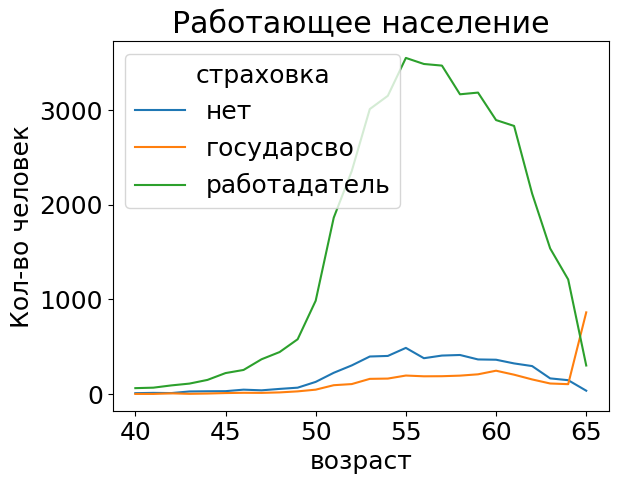

In [ ]:
df['tmp'] = (df['отсутствие мед страховки']==0).astype('int')
df.loc[(df['гос мед страховка']==0)&(df['tmp']==1), 'tmp'] = 2
df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает']=='полный рабочий день')].groupby(['возраст', 'tmp']).size().unstack().plot()
plt.legend(['нет', 'государсво', 'работадатель'], title='страховка')
plt.title('Работающее население')
plt.ylabel('Кол-во человек')

Страховка

Text(0.5, 1.0, 'У всего населения')

<Figure size 700x500 with 0 Axes>

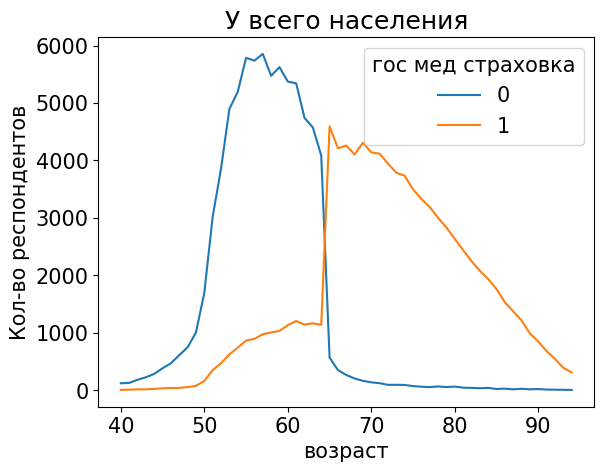

In [ ]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 15})

df[(df['возраст']>=40)&(df['возраст']<95)].groupby(['возраст', 'гос мед страховка']).size().unstack().plot()
plt.ylabel('Кол-во респондентов')
plt.title('У всего населения')

Text(0.5, 1.0, 'У рабочего населения')

<Figure size 700x500 with 0 Axes>

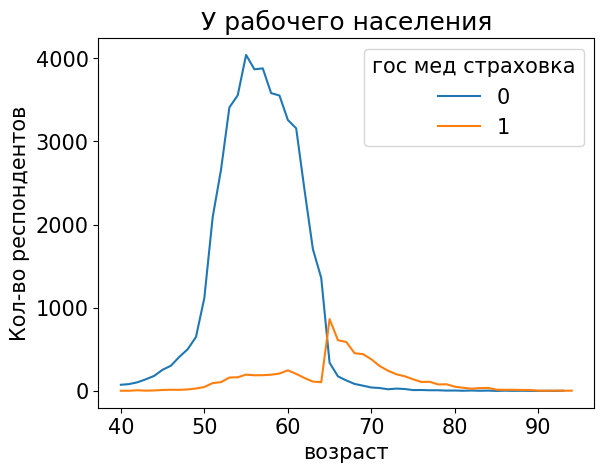

In [ ]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 15})

df[(df['возраст']>=40)&(df['возраст']<95)&(df['сколько работает']=='полный рабочий день')].groupby(['возраст', 'гос мед страховка']).size().unstack().plot()
plt.ylabel('Кол-во респондентов')
plt.title('У рабочего населения')

Text(0.5, 1.0, 'У всего населения')

<Figure size 700x500 with 0 Axes>

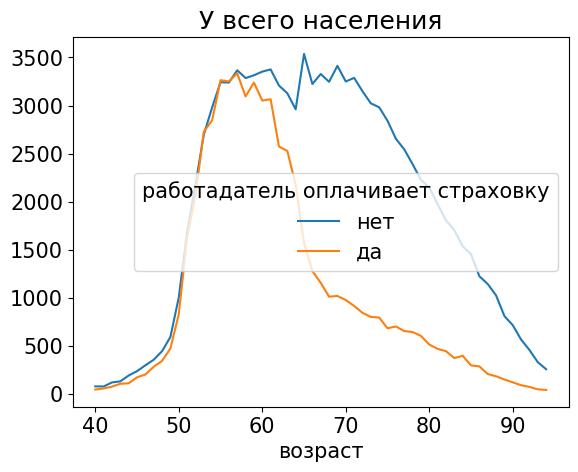

In [ ]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 15})

df[(df['возраст']>=40)&(df['возраст']<95)].groupby(['возраст', 'мед страховка оплачивается работадателем респондента']).size().unstack().plot()
plt.legend(['нет', 'да'], title='работадатель оплачивает страховку')
plt.title('У всего населения')

Text(0.5, 1.0, 'У рабочего населения')

<Figure size 700x500 with 0 Axes>

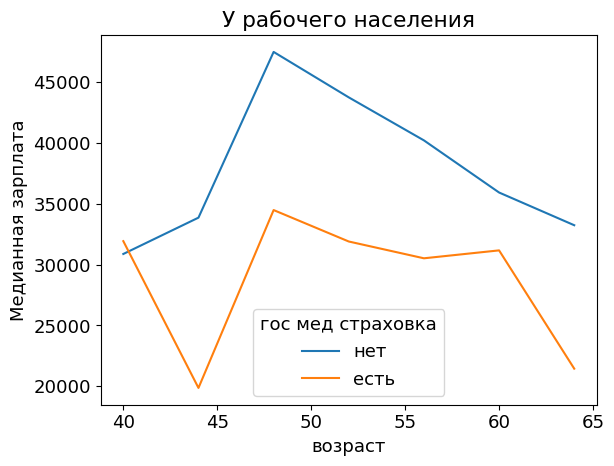

In [ ]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 13})

new_df = df[(df['пол']=='мужской')&(df['возраст']<=65)&(df['возраст']>=40)&(df['сколько работает']=='полный рабочий день')]

new_df['возраст'] -= new_df['возраст'] % 4

new_df.groupby(['возраст', 'гос мед страховка'])['доход от зп'].median().unstack().plot()
plt.ylabel('Медианная зарплата')
plt.legend(['нет', 'есть'], title='гос мед страховка')
plt.title('У рабочего населения')

Text(0.5, 1.0, 'У работающего населения')

<Figure size 700x500 with 0 Axes>

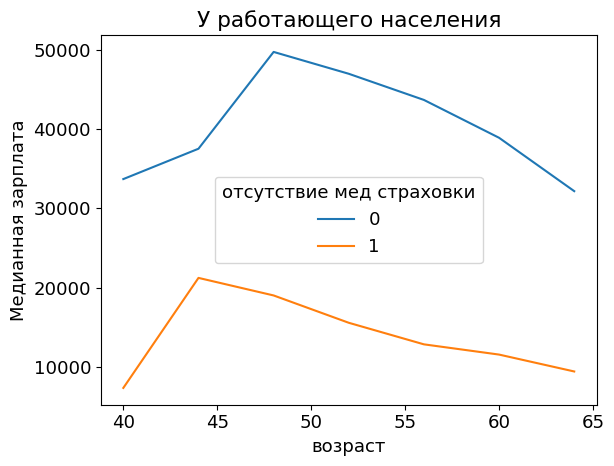

In [ ]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 13})

new_df = df[(df['пол']=='мужской')&(df['возраст']<=65)&(df['возраст']>=40)&(df['сколько работает']=='полный рабочий день')]

new_df['возраст'] -= new_df['возраст'] % 4

new_df.groupby(['возраст', 'отсутствие мед страховки'])['доход от зп'].median().unstack().plot()
plt.ylabel('Медианная зарплата')
plt.title('У работающего населения')
# plt.legend(['нет', 'есть'], title='гос мед страховка')

Text(0.5, 1.0, 'У работающего населения')

<Figure size 700x500 with 0 Axes>

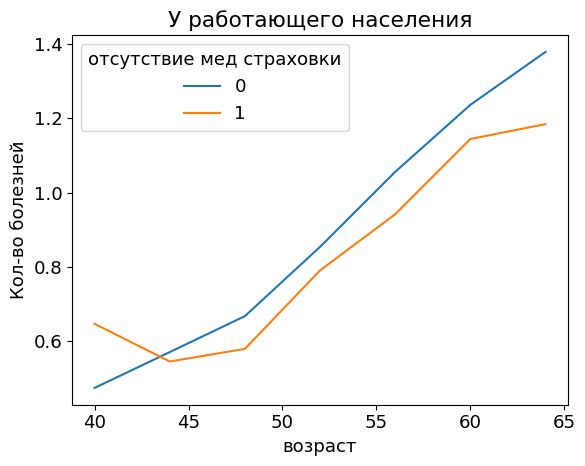

In [ ]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 13})

new_df = df[(df['пол']=='мужской')&(df['возраст']<=65)&(df['возраст']>=40)&(df['сколько работает']=='полный рабочий день')&(df['гос мед страховка']==0)]

new_df['возраст'] -= new_df['возраст'] % 4

new_df.groupby(['возраст', 'отсутствие мед страховки'])['sum'].mean().unstack().plot()
plt.ylabel('Кол-во болезней')
plt.title('У работающего населения')
# plt.legend(['нет', 'есть'], title='гос мед страховка')

Text(0.5, 1.0, 'У кого нет мед страховки')

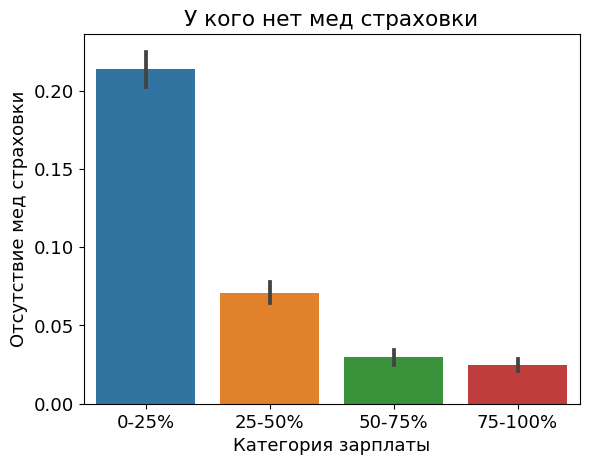

In [ ]:
new_df = df[(df['пол']=='мужской')&(df['возраст']<=65)&(df['возраст']>=40)&(df['сколько работает']=='полный рабочий день')&(df['доход от зп']!=0)]
income_q = new_df['доход от зп'].quantile([0.25,0.5,0.75]).tolist()
new_df['доход категория'] = (new_df['доход от зп'] > income_q[0]).astype(np.int8)
new_df.loc[new_df['доход от зп']>income_q[1], 'доход категория'] = 2
new_df.loc[new_df['доход от зп']>income_q[2], 'доход категория'] = 3
new_df['доход категория'] = new_df['доход категория'].replace({0:'0-25%', 1:'25-50%', 2:'50-75%', 3:'75-100%'})
sns.barplot(data=new_df, x='доход категория', y='отсутствие мед страховки', order=['0-25%', '25-50%', '50-75%', '75-100%'])
plt.ylabel('Отсутствие мед страховки')
plt.xlabel('Категория зарплаты')
plt.title('У кого нет мед страховки')

<Figure size 700x500 with 0 Axes>

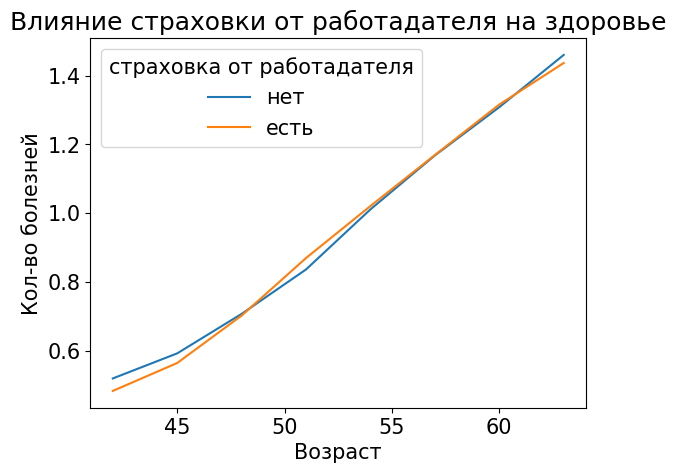

In [ ]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 15})

df['возраст'] -= df['возраст'] % 3
df[(df['возраст']<=65)&(df['возраст']>=40)&(df['сколько работает']=='полный рабочий день')].groupby(['возраст', 'мед страховка оплачивается работадателем респондента'])['sum'].mean().unstack().plot()
plt.ylabel('Кол-во болезней', fontsize=15)
plt.xlabel('Возраст', fontsize=15)
plt.title('Влияние страховки от работадателя на здоровье')
plt.legend(['нет', 'есть'], title='страховка от работадателя')

Text(0.5, 1.0, 'Какая страховка у человека')

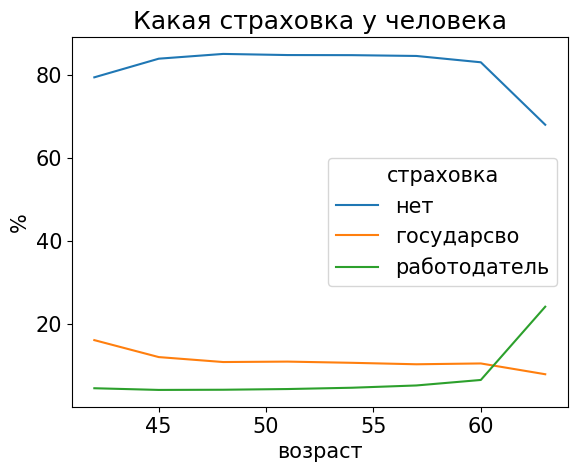

In [ ]:
df['tmp'] = (df['отсутствие мед страховки']==1).astype('int')
df.loc[df['гос мед страховка']==1, 'tmp'] = 2

a = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает']=='полный рабочий день')].groupby(['возраст', 'tmp']).size().unstack().fillna(0)
a['sum'] = a.sum(axis=1)
for x in a.columns[:-1]: a[x] /= a['sum']
a.drop('sum', axis=1, inplace=True)
(a * 100).plot()
plt.legend(['нет', 'государсво', 'работодатель'], title='страховка')
plt.ylabel('%')
plt.title('Какая страховка у человека')

Text(0, 0.5, 'Зарплата')

<Figure size 800x600 with 0 Axes>

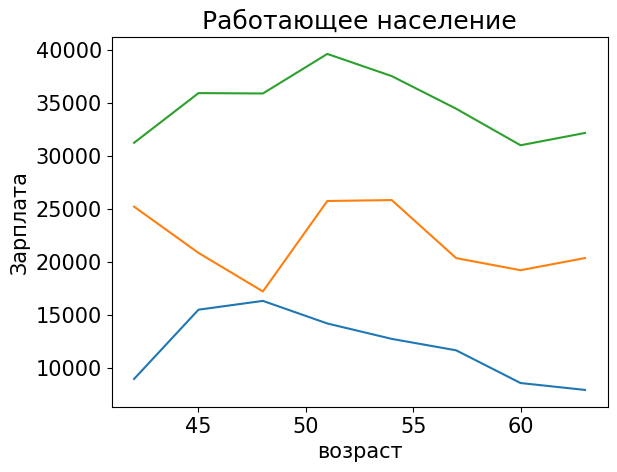

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 15})

df['tmp'] = (df['отсутствие мед страховки']==0).astype('int')
df.loc[(df['гос мед страховка']==0)&(df['tmp']==1), 'tmp'] = 2
df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает']=='полный рабочий день')].groupby(['возраст', 'tmp'])['доход от зп'].median().unstack().plot(legend=None)
# plt.legend(['нет', 'государсво', 'работодатель'], title='страховка')
plt.title('Работающее население')
plt.ylabel('Зарплата')

Text(0.5, 1.0, 'Влияние страховки от работадателя на здоровье')

<Figure size 2000x1500 with 0 Axes>

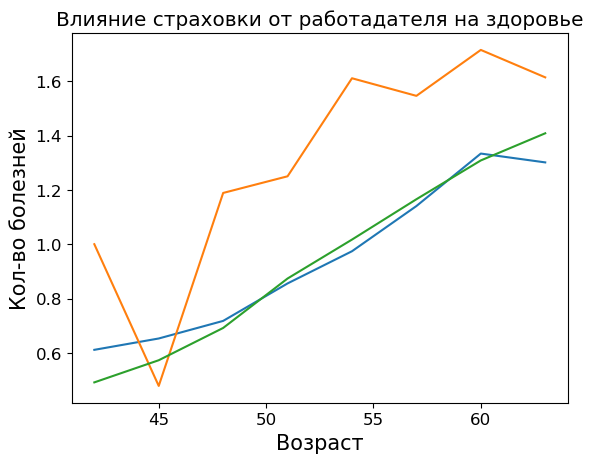

In [ ]:
plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 12})

new_df = df

new_df['возраст'] -= new_df['возраст'] % 3
new_df['num страховок'] = new_df['гос мед страховка'] + new_df['мед страховка оплачивается работадателем респондента'] + new_df['мед страховка оплачивается работадателем супруга']

# new_df['tmp'] = (new_df['отсутствие мед страховки']==1).astype('int')
# new_df.loc[new_df['гос мед страховка']==1, 'tmp'] = 2
df['tmp'] = (df['отсутствие мед страховки']==0).astype('int')
df.loc[(df['гос мед страховка']==0)&(df['tmp']==1), 'tmp'] = 2

new_df[(new_df['num страховок']<=1)&((new_df['отсутствие мед страховки']==1)|(new_df['мед страховка оплачивается работадателем респондента']==1)|(new_df['гос мед страховка']==1))&(new_df['возраст']<=65)&(new_df['возраст']>=40)&(new_df['сколько работает']=='полный рабочий день')].groupby(['возраст', 'tmp'])['sum'].mean().unstack().plot(legend=None)

plt.ylabel('Кол-во болезней', fontsize=15)
plt.xlabel('Возраст', fontsize=15)
plt.title('Влияние страховки от работадателя на здоровье')
# plt.legend(['работадатель', 'нет', 'государство'], title='мед страховка')

2 гипотеза

в среднем у тех кто в браке на 0.22 болезни меньше -0.21464854594579605


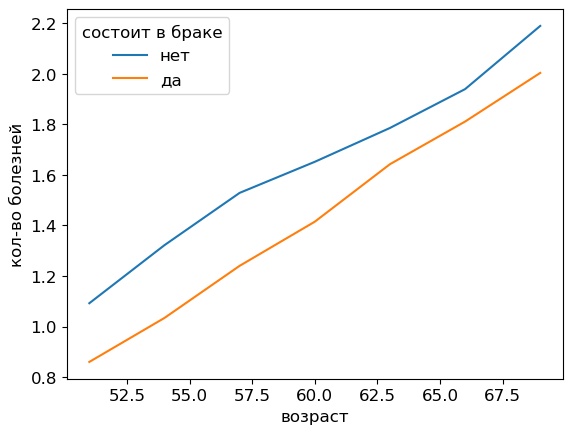

In [ ]:
df['в браке'] = (df['состоит в браке']=='да').astype('int')
a = df[(df['возраст']>=50)&(df['возраст']<=70)&(df['пол']=='мужской')].groupby(['возраст', 'в браке'])['sum'].mean().unstack()
print('в среднем у тех кто в браке на 0.22 болезни меньше', (a[1] - a[0]).mean())
a.plot()
plt.ylabel('кол-во болезней')
plt.legend(['нет', 'да'], title='состоит в браке')

<Figure size 700x600 with 0 Axes>

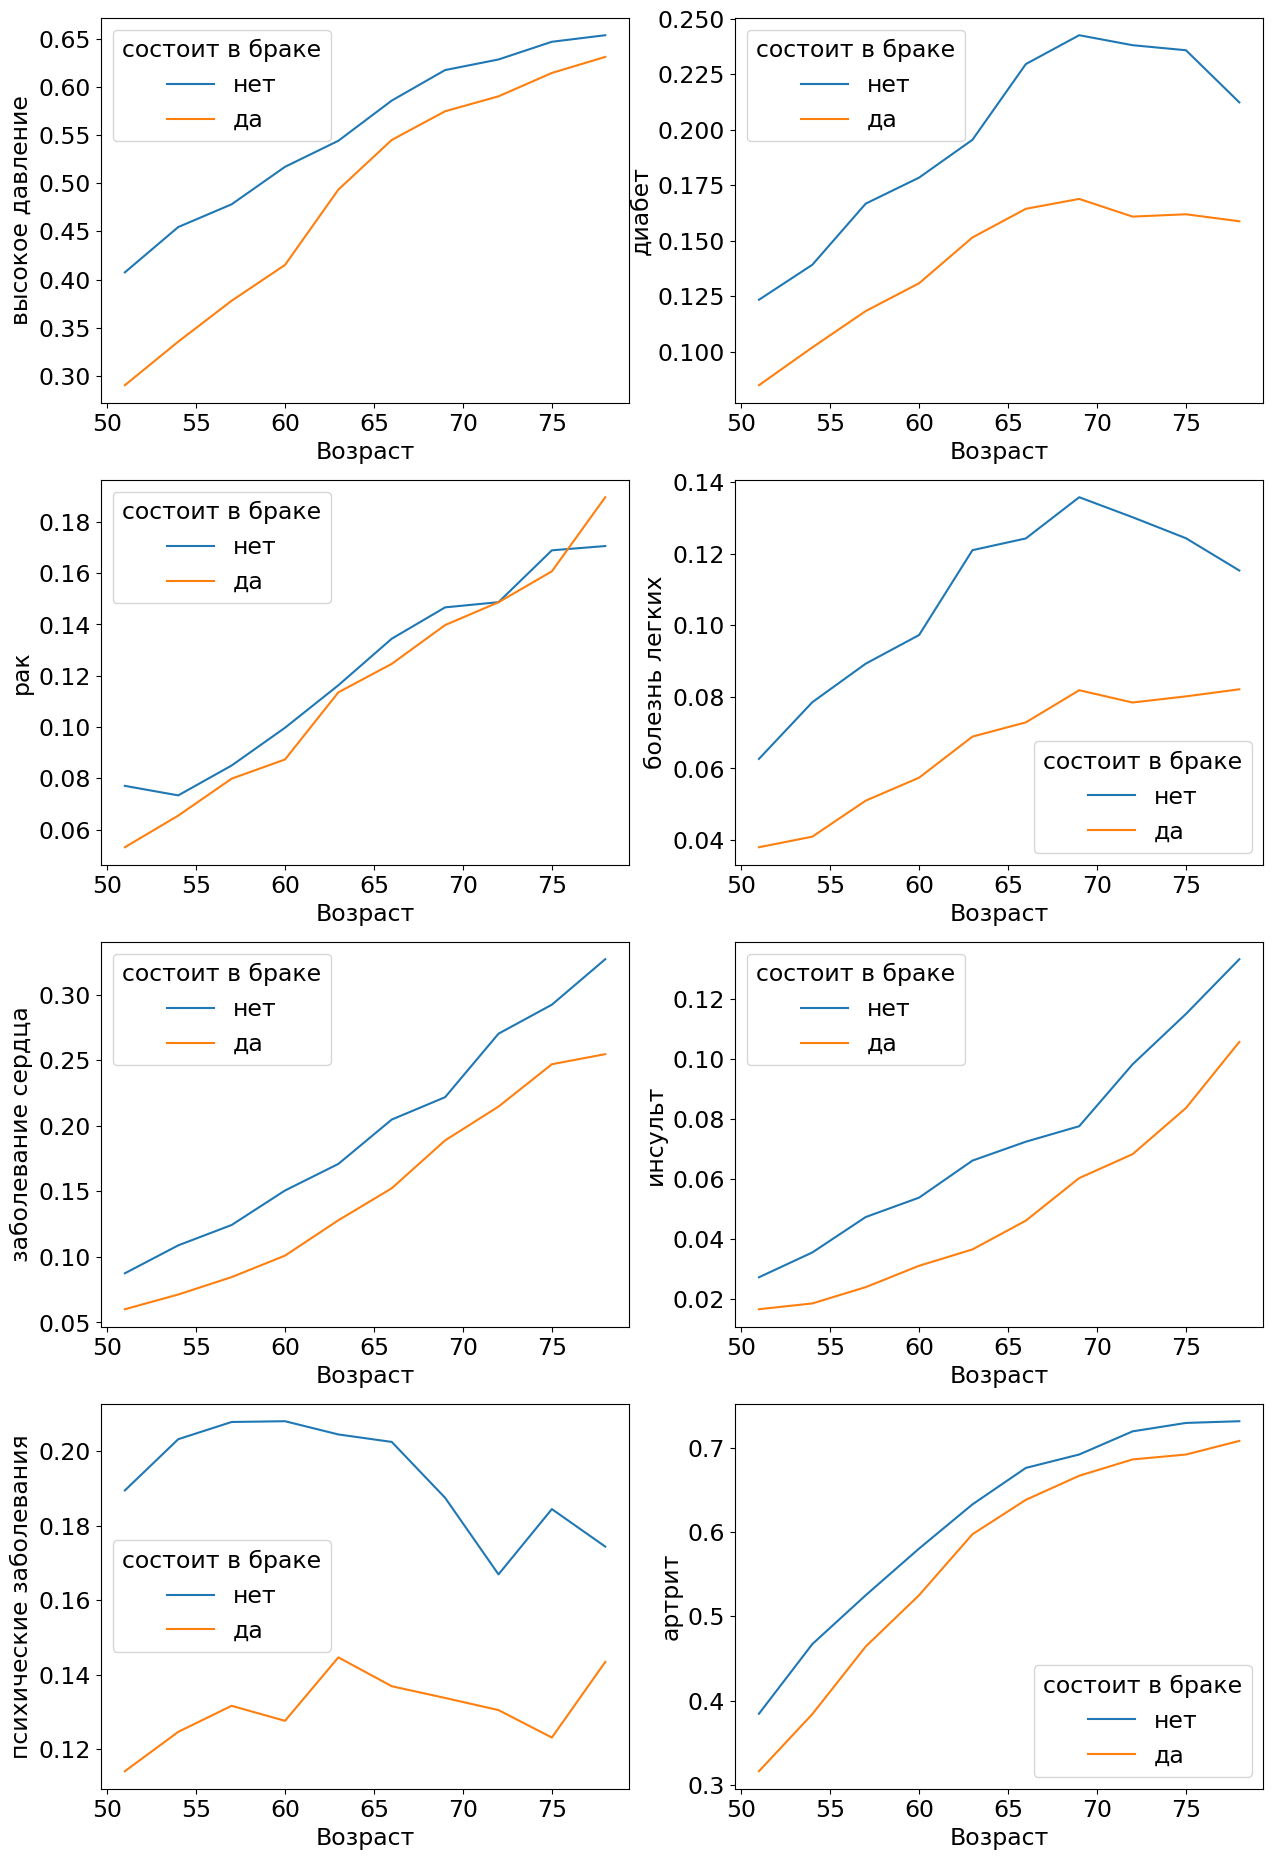

In [ ]:
plt.figure(figsize=(7,6))
plt.rcParams.update({'font.size': 17})

df['в браке'] = (df['состоит в браке'] == 'да').astype(np.int8)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 23))

for x, d in enumerate(diseases):
    a = df[(df['состоит в браке']!='не понятно')&(df['возраст']>=50)&(df['возраст']<=80)&(df['пол']=='женский')].groupby(['возраст', 'в браке'])[d].mean().unstack()
    axes[x//2, x%2].plot(a)
    axes[x//2, x%2].set_xlabel('Возраст')
    axes[x//2, x%2].set_ylabel(d)
    axes[x//2, x%2].legend(['нет', 'да'], title='состоит в браке')

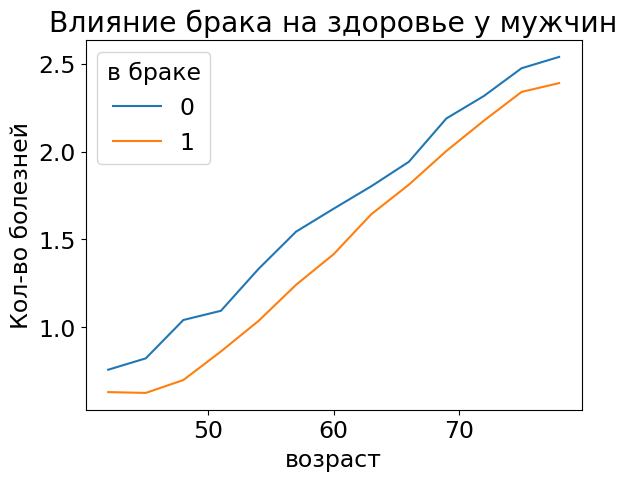

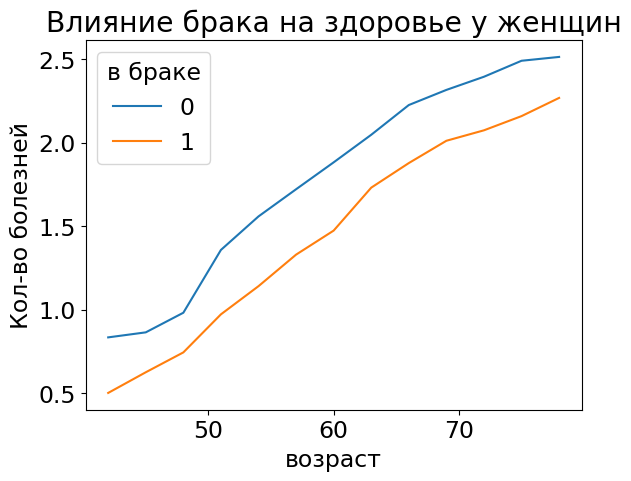

In [ ]:
df['в браке'] = (df['состоит в браке'] == 'да').astype('int')

df[(df['пол']=='мужской')&(df['возраст']>=40)&(df['возраст']<=80)&(df['состоит в браке']!='не понятно')].groupby(['возраст', 'в браке'])['sum'].mean().unstack().plot()
plt.ylabel('Кол-во болезней')
plt.title('Влияние брака на здоровье у мужчин')
plt.show()

df[(df['пол']=='женский')&(df['возраст']>=40)&(df['возраст']<=80)&(df['состоит в браке']!='не понятно')].groupby(['возраст', 'в браке'])['sum'].mean().unstack().plot()
plt.ylabel('Кол-во болезней')
plt.title('Влияние брака на здоровье у женщин')
plt.show()

In [ ]:
df['в браке'] = (df['состоит в браке'] == 'да').astype('int')
a = df[(df['пол']=='мужской')&(df['возраст']>=40)&(df['возраст']<=80)&(df['состоит в браке']!='не понятно')].groupby(['возраст', 'в браке'])['sum'].mean().unstack()
print('мужской', round((a[1]-a[0]).mean(), 4))

df['в браке'] = (df['состоит в браке'] == 'да').astype('int')
a = df[(df['пол']=='женский')&(df['возраст']>=40)&(df['возраст']<=80)&(df['состоит в браке']!='не понятно')].groupby(['возраст', 'в браке'])['sum'].mean().unstack()
print('женский', round((a[1]-a[0]).mean(), 4))

мужской -0.2044
женский -0.3293


Text(0.5, 1.0, 'Взаимосвязь физического труда и образования')

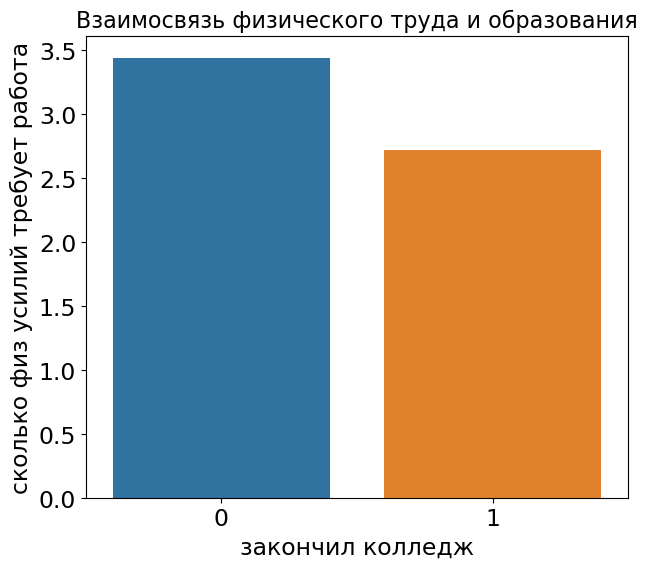

In [ ]:
plt.figure(figsize=(7, 6))
plt.rcParams.update({'font.size': 17})

new_df = df.copy(deep=True)
new_df['работа требует физ усилий'] = 6 - new_df['работа требует физ усилий']
a = new_df[(new_df['возраст']>=40)&(new_df['возраст']<=65)&(new_df['сколько работает']=='полный рабочий день')].groupby('закончил колледж')['работа требует физ усилий'].mean()
sns.barplot(x=a.index, y=a.tolist())
plt.ylabel('сколько физ усилий требует работа')
plt.title('Взаимосвязь физического труда и образования', fontsize=16)

In [ ]:

df = get_dataframe()

df['сколько работает num'] = df['сколько работает'].replace({
    'на пенсии': 0,
    'полный рабочий день': 2,
    'не работает': 0,
    'частично на пенсии': 1,
    'частичный рабочий день': 1,
    'инвалид': 0,
    'безработный': 0
})
df['sum'] = df[diseases].sum(axis=1)
df['пол'] = df['пол'].replace({1:'мужской', 2:'женский'})


new_df = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает']=='полный рабочий день')]

new_df['в браке'] = (new_df['состоит в браке'] == 'да').astype('int')

new_df = new_df[['сколько недель работал на осн работе за последний год', 'sum',
             'возраст', 'гос мед страховка', 'отсутствие мед страховки',
             'закончил колледж', 'в браке', 'доход от зп', 'пол'
             ]]

new_df['пол'] = new_df['пол'].replace({'мужской':0, 'женский':1})

for col in new_df.columns: new_df[col] = new_df[col].fillna(new_df[col].mean())

income_q = new_df['доход от зп'].quantile([0.25,0.5,0.75]).tolist()
new_df['доход категория'] = (new_df['доход от зп'] > income_q[0]).astype(np.int8)
new_df.loc[new_df['доход от зп']>income_q[1], 'доход категория'] = 2
new_df.loc[new_df['доход от зп']>income_q[2], 'доход категория'] = 3




import statsmodels.api as sm
new_df['const'] = 1
model = sm.OLS(new_df['sum'], new_df.drop(['sum', 'доход от зп'], axis=1))
res = model.fit()

a = pd.DataFrame({
    'coef': res.params,
    'p_value': res.pvalues
}).sort_values('coef', ascending=False)
a

,coef,p_value
гос мед страховка,0.208977,1.695501e-27
пол,0.100334,7.756069e-24
возраст,0.045764,0.000000e+00
сколько недель работал на осн работе за последний год,-0.004943,8.832082e-52
доход категория,-0.025516,1.138187e-07
отсутствие мед страховки,-0.078737,1.261431e-06
в браке,-0.090928,9.947253e-17
закончил колледж,-0.171564,8.255781e-54
const,-1.179150,2.857013e-67


In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sum   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     472.5
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:21:06   Log-Likelihood:                -73727.
No. Observations:               50049   AIC:                         1.475e+05
Df Residuals:                   50041   BIC:                         1.475e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
сколько недель работал на осн работе за последний год    -0.0053      0.000    -16.402      0.000      -0.006      -0.005
возраст                                                   0.0441      0.001     41.256      0.000       0.042       0.046
гос мед страховка                                         0.2013      0.019     10.470      0.000       0.164       0.239
отсутствие мед страховки                                 -0.0937      0.016     -5.783      0.000      -0.125      -0.062
закончил колледж                                         -0.1723      0.011    -15.517      0.000      -0.194      -0.151
в браке                                                  -0.1123      0.011    -10.450      0.000      -0.133      -0.091
доход категория                                          -0.0337      0.005     -7.103      0.000      -0.043      -0.024
const                                                    -0.9872      0.065    -15.122      0.000      -1.115      -0.859
==============================================================================
Omnibus:                     6749.500   Durbin-Watson:                   0.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10336.226
Skew:                           0.970   Prob(JB):                         0.00
Kurtosis:                       4.091   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

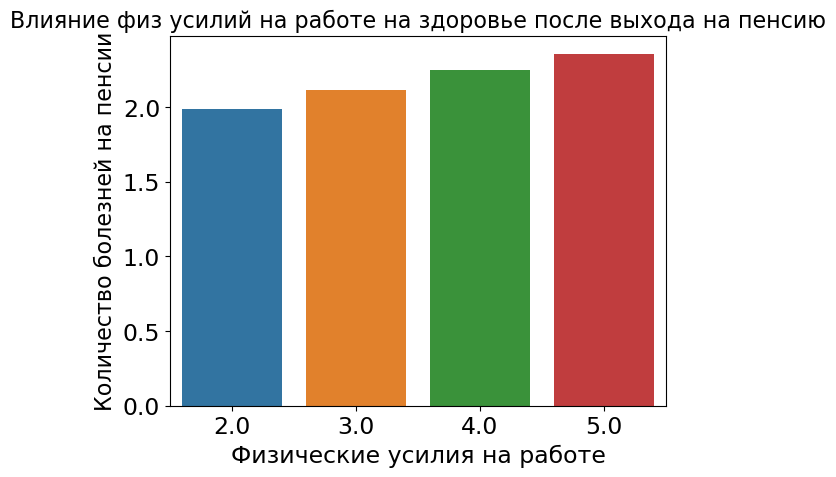

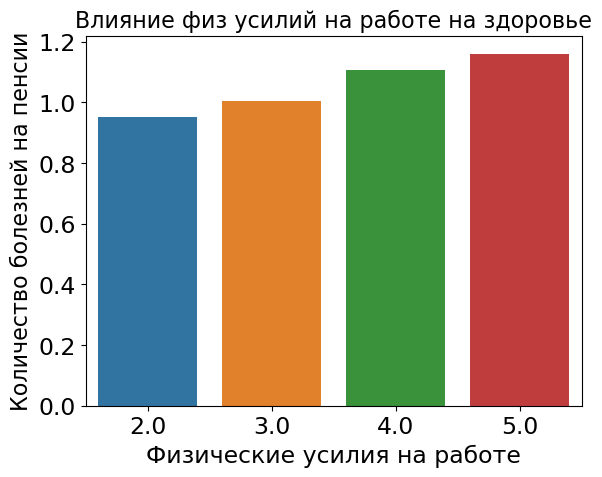

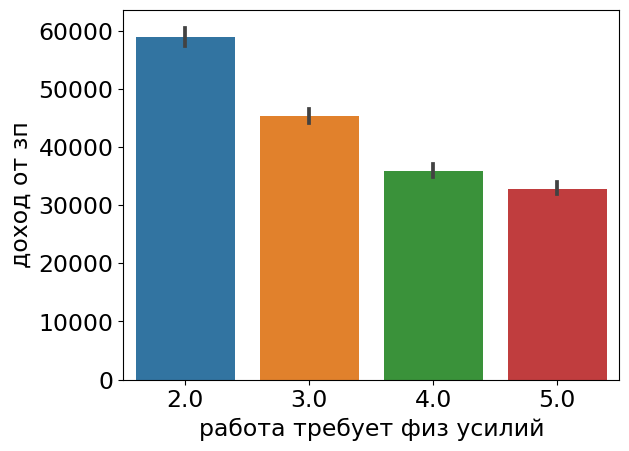

In [ ]:
new_df = df[(df['сколько работает'].isin(['полный рабочий день', 'на пенсии']))]
count = new_df['id'].value_counts()
count = count[count==11].index
new_df = new_df[new_df['id'].isin(count)]

new_df['работа требует физ усилий'] = 6 - new_df['работа требует физ усилий']

mean_work = new_df[new_df['сколько работает']=='полный рабочий день'].groupby('id')['работа требует физ усилий'].median().dropna().round().to_frame()
mean_work.rename({'работа требует физ усилий': 'сколько работал раньше'}, axis=1, inplace=True)

mean_diseases = new_df[new_df['сколько работает']=='на пенсии'].groupby('id')['sum'].median()
mean_work = mean_work.merge(mean_diseases, how='left', left_index=True, right_index=True).dropna().groupby('сколько работал раньше')['sum'].mean()
sns.barplot(x=mean_work.index, y=mean_work.tolist())
plt.title('Влияние физ усилий на работе на здоровье после выхода на пенсию', fontsize=16)
plt.xlabel('Физические усилия на работе')
plt.ylabel('Количество болезней на пенсии', fontsize=16)
plt.show()


mean_work = new_df[new_df['сколько работает']=='полный рабочий день'].groupby('id')['работа требует физ усилий'].median().dropna().round().to_frame()
mean_work.rename({'работа требует физ усилий': 'сколько работал раньше'}, axis=1, inplace=True)
mean_diseases = new_df[new_df['сколько работает']=='полный рабочий день'].groupby('id')['sum'].median()
mean_work = mean_work.merge(mean_diseases, how='left', left_index=True, right_index=True).dropna().groupby('сколько работал раньше')['sum'].mean()
sns.barplot(x=mean_work.index, y=mean_work.tolist())
plt.title('Влияние физ усилий на работе на здоровье', fontsize=16)
plt.xlabel('Физические усилия на работе')
plt.ylabel('Количество болезней на пенсии', fontsize=16)
plt.show()


new_df = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает']=='полный рабочий день')&(df['доход от зп']!=0)]
new_df['работа требует физ усилий'] = 6 - new_df['работа требует физ усилий']
mean_work = new_df[new_df['работа требует физ усилий']!=1].groupby('id')[['работа требует физ усилий', 'доход от зп']].median().dropna().round()
sns.barplot(data=mean_work, x='работа требует физ усилий', y='доход от зп')
plt.show()

In [ ]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression().fit(new_df.drop(['sum', 'доход от зп'], axis=1), new_df['sum'])
# a = model.predict(new_df.drop(['sum', 'доход от зп'], axis=1))
# pd.DataFrame({
#     'target': new_df['sum'].tolist(),
#     'pred': a
# })

In [ ]:
for x in a.coef:
    print(round(x, 3))

0.201
0.044
-0.005
-0.034
-0.094
-0.112
-0.172
-0.987


F_onewayResult(statistic=143.91073214083318, pvalue=4.579103159107395e-33)

<Figure size 700x600 with 0 Axes>

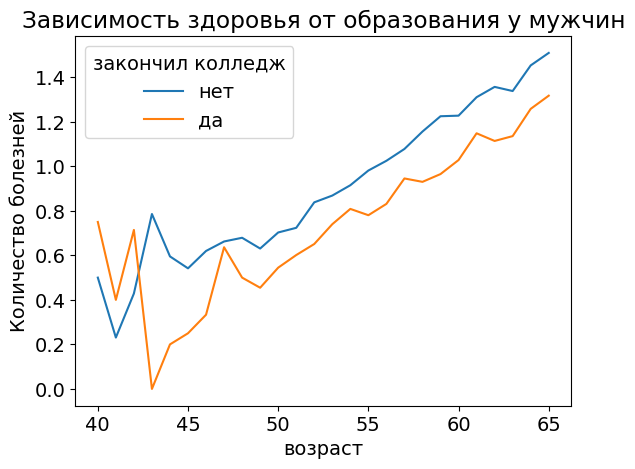

In [ ]:
plt.figure(figsize=(7,6))
plt.rcParams.update({'font.size': 14})

a = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает']=='полный рабочий день')&(df['пол']=='мужской')]

a.groupby(['возраст', 'закончил колледж'])['sum'].mean().unstack().plot()
plt.ylabel('Количество болезней')
plt.title('Зависимость здоровья от образования у мужчин')
plt.legend(['нет', 'да'], title='закончил колледж')

group_0 = a[a['закончил колледж']==0]['sum'].tolist()
group_1 = a[a['закончил колледж']==1]['sum'].tolist()

from scipy.stats import f_oneway
f_oneway(group_0, group_1)

F_onewayResult(statistic=160.86491732993073, pvalue=9.505608767153577e-37)

<Figure size 700x600 with 0 Axes>

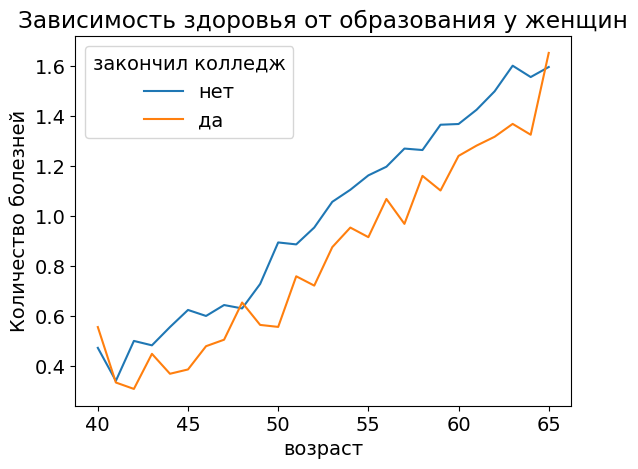

In [ ]:
plt.figure(figsize=(7,6))
plt.rcParams.update({'font.size': 14})

a = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает']=='полный рабочий день')&(df['пол']=='женский')]

a.groupby(['возраст', 'закончил колледж'])['sum'].mean().unstack().plot()
plt.ylabel('Количество болезней')
plt.title('Зависимость здоровья от образования у женщин')
plt.legend(['нет', 'да'], title='закончил колледж')

group_0 = a[a['закончил колледж']==0]['sum'].tolist()
group_1 = a[a['закончил колледж']==1]['sum'].tolist()

from scipy.stats import f_oneway
f_oneway(group_0, group_1)

In [ ]:
new_df = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает num']==2)&(df['доход от зп']!=0)&(df['пол']=='мужской')]
new_df.groupby(['возраст', 'закончил колледж'])['доход от зп'].median().unstack().plot()
plt.title('Зависимость зарплаты от образования', fontsize=17)
plt.ylabel('Зарплата')


Text(0, 0.5, 'Зарплата')

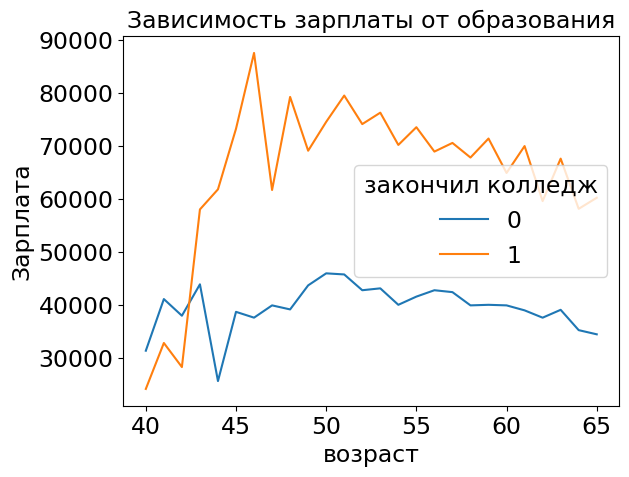

In [ ]:
new_df = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает num']==2)&(df['доход от зп']!=0)&(df['пол']=='мужской')]
new_df.groupby(['возраст', 'закончил колледж'])['доход от зп'].median().unstack().plot()
plt.title('Зависимость зарплаты от образования', fontsize=17)
plt.ylabel('Зарплата')


Text(0, 0.5, 'Зарплата')

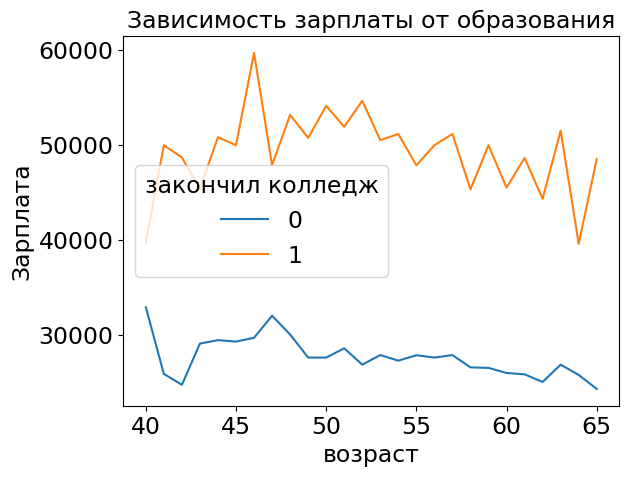

In [ ]:
new_df = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает num']==2)&(df['доход от зп']!=0)&(df['пол']=='женский')]
new_df.groupby(['возраст', 'закончил колледж'])['доход от зп'].median().unstack().plot()
plt.title('Зависимость зарплаты от образования', fontsize=17)
plt.ylabel('Зарплата')

Text(0, 0.5, 'Зарплата')

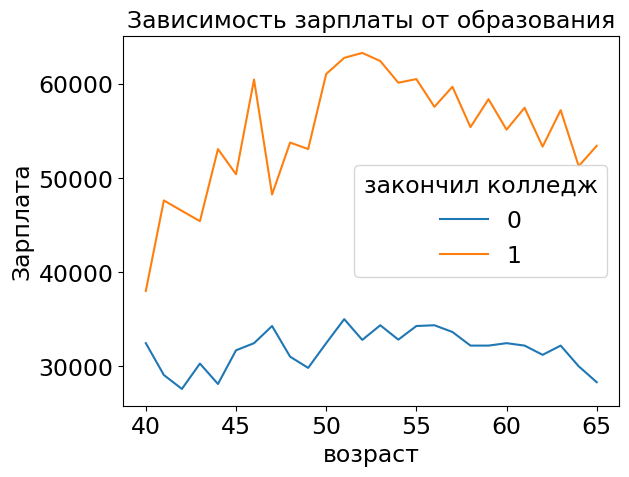

In [ ]:
new_df = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает num']==2)&(df['доход от зп']!=0)]
new_df.groupby(['возраст', 'закончил колледж'])['доход от зп'].median().unstack().plot()
plt.title('Зависимость зарплаты от образования', fontsize=17)
plt.ylabel('Зарплата')

AttributeError: module 'matplotlib.pyplot' has no attribute 'y'

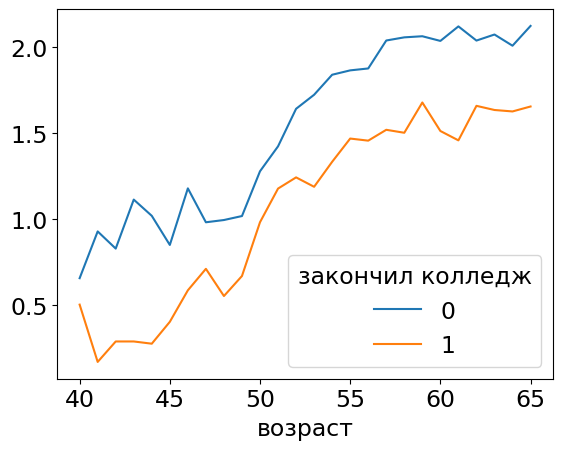

In [ ]:
new_df = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает num']==0)]
new_df.groupby(['возраст', 'закончил колледж'])['sum'].mean().unstack().plot()
plt.y

In [ ]:
new_df = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает num']==0)&(df['пол']=='мужской')]
import statsmodels.api as sm
new_df['const'] = 1
model = sm.OLS(new_df['sum'], new_df[['закончил колледж', 'const']])
res = model.fit()

a = pd.DataFrame({
    'coef': res.params,
    'p_value': res.pvalues
}).sort_values('coef', ascending=False)
a

,coef,p_value
const,1.970371,0.000000e+00
закончил колледж,-0.339963,2.153847e-17


In [ ]:
new_df = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает num']==0)&(df['пол']=='женский')]
import statsmodels.api as sm
new_df['const'] = 1
model = sm.OLS(new_df['sum'], new_df[['закончил колледж', 'const']])
res = model.fit()

a = pd.DataFrame({
    'coef': res.params,
    'p_value': res.pvalues
}).sort_values('coef', ascending=False)
a

,coef,p_value
const,1.928973,0.000000e+00
закончил колледж,-0.543913,4.432771e-59


Text(0, 0.5, 'Количество болезней')

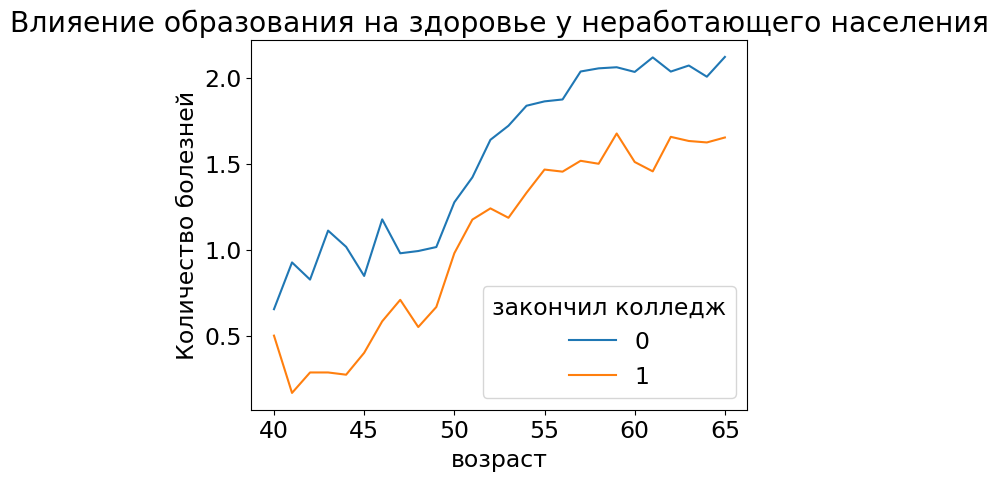

In [ ]:
new_df = df[(df['возраст']>=40)&(df['возраст']<=65)&(df['сколько работает num']==0)]
new_df.groupby(['возраст', 'закончил колледж'])['sum'].mean().unstack().plot()
plt.title('Влияение образования на здоровье у неработающего населения')
plt.ylabel('Количество болезней')